<a href="https://colab.research.google.com/github/karenmelo23/proyecto_integrado_2/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: armar un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Lista de materias escolares argentinas de nivel secundario
materias = [
    "Matemática", "Lengua y Literatura", "Historia", "Geografía", "Ciencias Naturales",
    "Educación Física", "Inglés", "Física", "Química", "Biología", "Filosofía", "Sociología",
    "Arte", "Música", "Informática"
]

# Crear una lista de apellidos y nombres aleatorios
apellidos = ["García", "Rodríguez", "González", "Fernández", "López", "Martínez", "Pérez", "Gómez", "Sánchez", "Romero"]
nombres = ["Juan", "María", "José", "Ana", "Carlos", "Laura", "Pedro", "Marta", "Luis", "Sofía"]

# Generar datos para 100 filas
data = []
for i in range(100):
  apellido = random.choice(apellidos)
  nombre = random.choice(nombres)
  nro_dni = random.randint(10000000, 99999999)
  materia = random.choice(materias)
  nota_1er_trimestre = random.randint(1, 10)
  nota_2do_trimestre = random.randint(1, 10)
  nota_3er_trimestre = random.randint(1, 10)
  faltas = random.randint(0, 20)
  data.append([apellido, nombre, nro_dni, materia, nota_1er_trimestre, nota_2do_trimestre, nota_3er_trimestre, faltas])

# Crear un DataFrame con los datos generados
df = pd.DataFrame(data, columns=["Apellido", "Nombre", "Nro_DNI", "Materia Escolar", "Nota 1er Trimestre", "Nota 2do Trimestre", "Nota 3er Trimestre", "Faltas a Clases"])

# Mostrar las primeras 10 filas del DataFrame
print(df.head(10))

    Apellido Nombre   Nro_DNI   Materia Escolar  Nota 1er Trimestre  \
0      López   José  49098408          Historia                   9   
1  Rodríguez  Marta  53597328          Historia                   8   
2   Martínez  Sofía  35070002            Música                   2   
3      López  Pedro  48349887            Inglés                   3   
4    Sánchez   Juan  80537769        Sociología                   3   
5     García  Sofía  79152878            Inglés                   2   
6      Gómez   Juan  24565390         Filosofía                   3   
7   González   José  48868518         Geografía                   9   
8  Fernández  Laura  62961699          Historia                  10   
9  Fernández   Juan  34964207  Educación Física                   3   

   Nota 2do Trimestre  Nota 3er Trimestre  Faltas a Clases  
0                   1                   4                7  
1                   6                   7                0  
2                   4              

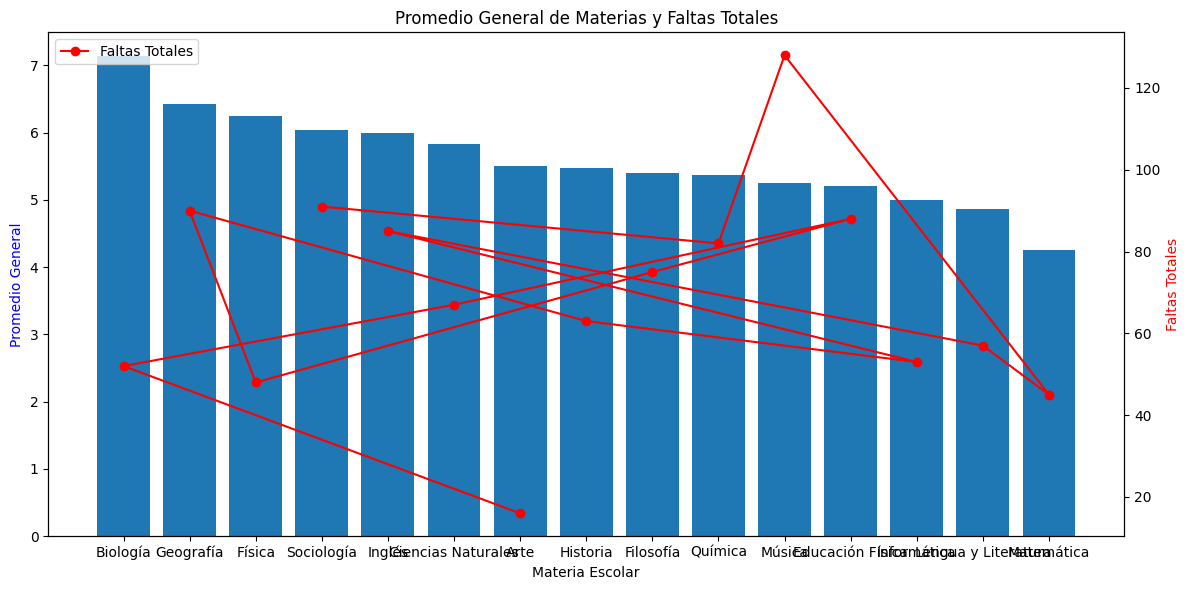

In [2]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor contrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import pandas as pd
import matplotlib.pyplot as plt

# Calcular el promedio general de cada materia
promedio_por_materia = df.groupby('Materia Escolar')[['Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre']].mean().mean(axis=1)

# Ordenar las materias de mayor a menor promedio
promedio_por_materia_ordenado = promedio_por_materia.sort_values(ascending=False)

# Calcular la cantidad total de faltas por materia
faltas_por_materia = df.groupby('Materia Escolar')['Faltas a Clases'].sum()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(111)
ax1.bar(promedio_por_materia_ordenado.index, promedio_por_materia_ordenado.values)

# Crear el eje secundario para las faltas
ax2 = ax1.twinx()
ax2.plot(faltas_por_materia.index, faltas_por_materia.values, color='red', marker='o')

# Agregar etiquetas y título
plt.title('Promedio General de Materias y Faltas Totales')
ax1.set_xlabel('Materia Escolar')
ax1.set_ylabel('Promedio General', color='blue')
ax2.set_ylabel('Faltas Totales', color='red')

# Rotar las etiquetas del eje x para mejor visualización
plt.xticks(rotation=45, ha='right')

# Agregar leyenda para el eje secundario
ax2.legend(['Faltas Totales'], loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [3]:
df.to_csv("datos_alumnos.csv", index=False)



In [4]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful